# Laboratorio 6
#### 20880 Sebastian Aristondo
#### 20293 Daniel Gonzalez

## Ejercicio 1

Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde combina un modelo macroscópico y un
modelo microscópico. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas.

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [77]:
class atomo(object):
    
    def __init__(self, masa, left_neighbour, right_neighbour, position):
        self.move= ["left", "right"]
        self.mass = masa
        self.left_neighbour = left_neighbour
        self.right_neighbour = right_neighbour
        self.position = position

    def random_move(self):
        self.position = random.choice(self.move)
    
    def exist_colision(self):
        if self.left_neighbour:
            if self.left_neighbour.position == "right" and self.position == "left":
                return (self.left_neighbour.mass + self.mass)*0.5
        if self.right_neighbour:  
            if self.right_neighbour.position == "left" and self.position == "right":
                return (self.right_neighbour.mass + self.mass)*0.5
        
        return 0


In [78]:
masa_aluminio = 2700
masa_hierro = 7850
tipo_atomo = [masa_aluminio, masa_hierro]
c = (masa_hierro * 450 + masa_aluminio * 900) / (masa_aluminio + masa_hierro)
T = 280
iteraciones_micro = 1000
atomos = 10000
epochs = 20

In [79]:
# Definir el rango deseado para velocidades más frecuentes
velocidad_minima = 10
velocidad_maxima = 20

# Calcular la media en ese rango
media_en_rango = (velocidad_maxima + velocidad_minima) / 2

# Calcular la tasa (lambda) para la distribución exponencial
lambda_param = 1 / media_en_rango

# Tamaño de la muestra
tamaño_muestra = epochs * iteraciones_micro

# Generar una muestra de velocidades con distribución exponencial
muestras_exponencial = np.random.exponential(scale=1/lambda_param, size=tamaño_muestra)

In [80]:
varilla=[]
m = 0
for i in range(atomos):
    if i % 2 ==0:
        varilla.append(atomo(masa_aluminio, None, None, i))
        m += masa_aluminio
    else:
        varilla.append(atomo(masa_hierro, None, None, i))
        m += masa_hierro
        
for i in range(atomos):
    if i == 0:
        varilla[i].right_neighbour = varilla[i+1]
    elif i == atomos-1:
        varilla[i].left_neighbour = varilla[i-1]
    else:
        varilla[i].left_neighbour = varilla[i-1]
        varilla[i].right_neighbour = varilla[i+1]
    

In [81]:
def calculate_Q(res, velocity):
    return res * velocity

In [82]:
def temperature_differnce(Q):
    return Q / (m * c)

In [84]:
i = 0
temperatura = []
for epoch in range(epochs):
    Q_acumulado = 0
    for iteraciones in range(iteraciones_micro):
        velocidad = muestras_exponencial[i]
        i += 1
        for atomo in varilla:
            atomo.random_move()
        for atomo in varilla:
            Q_acumulado += calculate_Q(atomo.exist_colision(), velocidad)
    Q_acumulado /= 2.0
    Q_promedio = Q_acumulado / iteraciones_micro
    T = T + temperature_differnce(Q_promedio)
    temperatura.append(T)


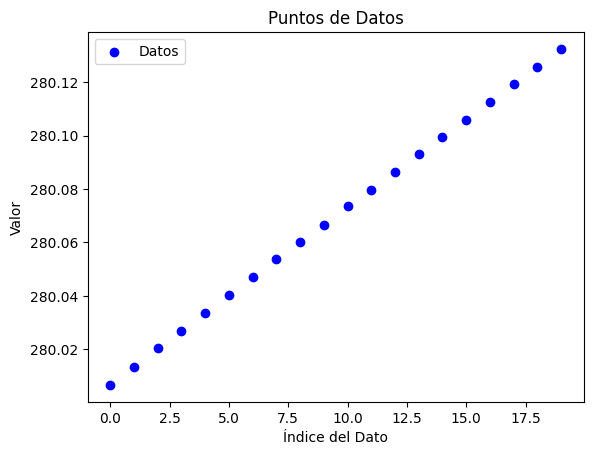

In [85]:
plt.scatter(range(len(temperatura)), temperatura, color='b', label='Datos', marker='o')

# Añadir etiquetas y título
plt.xlabel('Índice del Dato')
plt.ylabel('Valor')
plt.title('Puntos de Datos')

# Mostrar el gráfico
plt.legend()
plt.show()